<a href="https://colab.research.google.com/github/AguaClara/ram_pump/blob/master/Fall%202019/data_analysis_colab/flow_analysis_total_nov24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install aguaclara

     |████████████████████████████████| 92kB 4.0MB/s 
     |████████████████████████████████| 13.0MB 171kB/s 
     |████████████████████████████████| 163kB 36.6MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.1.13-cp36-none-any.whl size=97010 sha256=e7c9df88a3924eb17578ec96fb72b6ed4eae0527aecd27270ab5199aa97cdeb4
  Stored in directory: /root/.cache/pip/wheels/13/65/3f/fa24d7d43535d7c44774b8f05d782324a26a155afc5447de05
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134155 sha256=ac33acca517325d1077699d094c7c7d9e107b4f3d5dc7fa1483c1ab5a6d6fda0
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.2
    Uninstalling matplotlib-3.1.2:
      Successfully uninstalled matplotlib-3.1.2


In [0]:
import aguaclara.research.procoda_parser as pp
import matplotlib.pyplot as plt
import numpy as np
import aguaclara.core.constants as c
import aguaclara.core.physchem as pc
import pandas as pd
from aguaclara.research.peristaltic_pump import vol_per_rev_LS
from aguaclara.core.units import unit_registry as u
from scipy import integrate
from aguaclara.research.peristaltic_pump import flow_rate
from aguaclara.core.units import u
import aguaclara as ac
from scipy import integrate

In [0]:
nov24 = 'https://raw.githubusercontent.com/AguaClara/ram_pump/master/Fall%202019/datalog/nov24.tsv'
note = pp.notes(nov24)

In [0]:

first_row = np.array([]);
first_row = note.iloc[:,0].index.tolist()
start = np.array([])
end = np.array([])
num_turn = 0; #starting number of turns
turn = np.array([])
for i in range(0,len(first_row)-1,2):
  start = np.append(start,first_row[i])
  end = np.append(end,first_row[i+1])
  turn = np.append(turn,num_turn)
  num_turn = num_turn+1
a = np.empty(len(start));
a.fill(100);
start = np.add(start,a)
end = np.subtract(end,a)
start = np.array(start, dtype='int')
end = np.array(end, dtype='int')


In [0]:
#figure out if theres a way to put start end index in an array
#check procoda parser documentation
flow_tot = np.array([])
rate_tot = np.array([])
dur_tot = np.array([])
for j in range (0,len(start)):
  time = (pp.column_of_time(nov24,start[j],end[j])).to(u.s)
  airchamber = -pp.column_of_data(nov24, start[j], 2, end[j], 'cm')
  pump = pp.column_of_data(nov24, start[j], 4, end[j], 'rpm')
  rate = np.array([])
  deltatime = time[len(time)-1]-time[0];
  #for loop or vector calc
  for k in range(0,len(time)-1):
    rate = np.append(rate, ac.flow_rate(ac.vol_per_rev_LS(17),pump[k]*2*600))
  rate_avg =   np.average(rate)
  flow = integrate.simps(rate, x=None, dx=deltatime, axis=-1, even='avg')
  flow_tot = np.append(flow_tot,flow)
  rate_tot = np.append(rate_tot,rate_avg)
  dur_tot = np.append(dur_tot, deltatime)



In [0]:
turn = np.array(turn, dtype='int')
dur_tot = dur_tot
flow_tot = flow_tot
rate_tot = rate_tot
for m in range(0, len(dur_tot)):
  total = "After {} turn, the total flow is {} in {}, and the average flow rate is {}."
  print(total.format(turn[m], flow_tot[m], dur_tot[m], rate_tot[m]))

After 0 turn, the total flow is 36547972.6595244 in 99.45995615999088, and the average flow rate is 22.18046695119251.
After 1 turn, the total flow is 18369669.23918104 in 68.95194336000579, and the average flow rate is 23.210658870221238.
After 2 turn, the total flow is 14795635.358769702 in 62.21876544000331, and the average flow rate is 22.95599380949892.
After 3 turn, the total flow is 19401727.796720482 in 69.54050016001254, and the average flow rate is 24.151420740066545.
After 4 turn, the total flow is 18954478.570007328 in 67.95045504000079, and the average flow rate is 24.66579782651756.
After 5 turn, the total flow is 17098915.655591723 in 64.56610656000734, and the average flow rate is 24.68325602557405.
After 6 turn, the total flow is 22278324.06171412 in 77.50142207999708, and the average flow rate is 22.269795092895126.
After 7 turn, the total flow is 15751157.798212413 in 70.87811904000176, and the average flow rate is 18.815777366207517.
After 8 turn, the total flow is 

[22.18046695 23.21065887 22.95599381 24.15142074 24.66579783 24.68325603
 22.26979509 18.81577737 13.33902381]


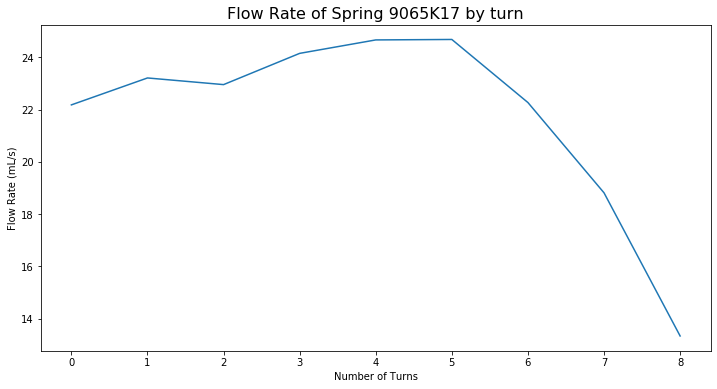

In [0]:
print(rate_tot)
plt.figure(figsize=(12,6))
plt.plot(turn,rate_tot, '-')
plt.title('Flow Rate of Spring 9065K17 by turn', fontsize=16)
plt.xlabel('Number of Turns')
plt.ylabel('Flow Rate (mL/s)')
plt.show()